# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [5]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Image dimensions: (32, 32, 3)
Number of classes: 100


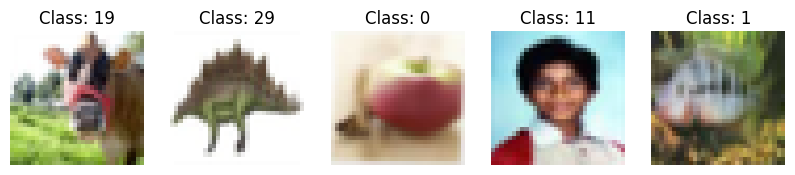

In [6]:
import matplotlib.pyplot as plt
from keras.datasets import cifar100

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Examine shape of training and test sets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Extract dimensions of images
image_shape = x_train.shape[1:]  # Height, Width, Channels
print(f"Image dimensions: {image_shape}")

# Determine number of classes
num_classes = len(set(y_train.flatten()))
print(f"Number of classes: {num_classes}")

# Examples from training set
def show_examples(x, y, num_examples=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_examples):
        plt.subplot(1, num_examples, i + 1)
        plt.imshow(x[i])
        plt.title(f"Class: {y[i][0]}")
        plt.axis("off")
    plt.show()

# Show examples
show_examples(x_train, y_train)


### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar100

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Normalize images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
num_classes = 100
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Split training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Print shapes to verify
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


x_train shape: (40000, 32, 32, 3), y_train shape: (40000, 100)
x_val shape: (10000, 32, 32, 3), y_val shape: (10000, 100)
x_test shape: (10000, 32, 32, 3), y_test shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# 1st Dense Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output Layer (100 classes for CIFAR-100)
model.add(Dense(100, activation='softmax'))

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          51,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,193,636 (4.55 MB)

 Trainable params: 1,193,636 (4.55 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [9]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
model = Sequential()

# Add convolutional layers, max pooling layers, and dense layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

# Compile model
model.compile(
    loss='categorical_crossentropy',  # Loss function
    optimizer=optimizers.Adam(learning_rate=0.001),  # Optimizer
    metrics=['accuracy']
)

# Print model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          51,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,193,636 (4.55 MB)

 Trainable params: 1,193,636 (4.55 MB)

 Non-trainable params: 0 (0.00 B)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [10]:
# Train model
history = model.fit(
    x=x_train,  # Training data
    y=y_train,  # Training labels
    validation_data=(x_val, y_val),  # Validation data
    epochs=20,  # Number of epochs
    batch_size=32,  # Batch size
    verbose=2  # Display training progress
)


Epoch 1/20
1250/1250 - 11s - 9ms/step - accuracy: 0.0843 - loss: 4.0020 - val_accuracy: 0.1679 - val_loss: 3.4701
Epoch 2/20
1250/1250 - 4s - 3ms/step - accuracy: 0.1928 - loss: 3.3338 - val_accuracy: 0.2776 - val_loss: 2.9696
Epoch 3/20
1250/1250 - 4s - 3ms/step - accuracy: 0.2680 - loss: 2.9430 - val_accuracy: 0.3328 - val_loss: 2.6842
Epoch 4/20
1250/1250 - 5s - 4ms/step - accuracy: 0.3228 - loss: 2.6686 - val_accuracy: 0.3501 - val_loss: 2.5717
Epoch 5/20
1250/1250 - 4s - 3ms/step - accuracy: 0.3636 - loss: 2.4687 - val_accuracy: 0.3711 - val_loss: 2.4378
Epoch 6/20
1250/1250 - 6s - 5ms/step - accuracy: 0.3995 - loss: 2.2954 - val_accuracy: 0.3875 - val_loss: 2.3783
Epoch 7/20
1250/1250 - 4s - 4ms/step - accuracy: 0.4305 - loss: 2.1340 - val_accuracy: 0.3995 - val_loss: 2.3462
Epoch 8/20
1250/1250 - 5s - 4ms/step - accuracy: 0.4663 - loss: 1.9789 - val_accuracy: 0.4042 - val_loss: 2.3334
Epoch 9/20
1250/1250 - 5s - 4ms/step - accuracy: 0.4925 - loss: 1.8485 - val_accuracy: 0.4124 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [11]:
# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# Report Accuracy
accuracy = test_accuracy

# Choose another metric - Mean IoU
from sklearn.metrics import jaccard_score
import numpy as np

# Calculate Mean IoU for each class and average them
y_test_true = np.argmax(y_test, axis=1)
y_test_pred = np.argmax(model.predict(x_test), axis=1)

# Calculate IoU for each class
iou_per_class = []
for i in range(100):
    iou = jaccard_score(y_test_true == i, y_test_pred == i, average='binary')
    iou_per_class.append(iou)

mean_iou = np.mean(iou_per_class)

# Output results
print(f"Accuracy: {accuracy:.4f}")
print(f"Mean IoU: {mean_iou:.4f}")


313/313 - 0s - 2ms/step - accuracy: 0.4079 - loss: 2.9696
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.4079
Mean IoU: 0.2694


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

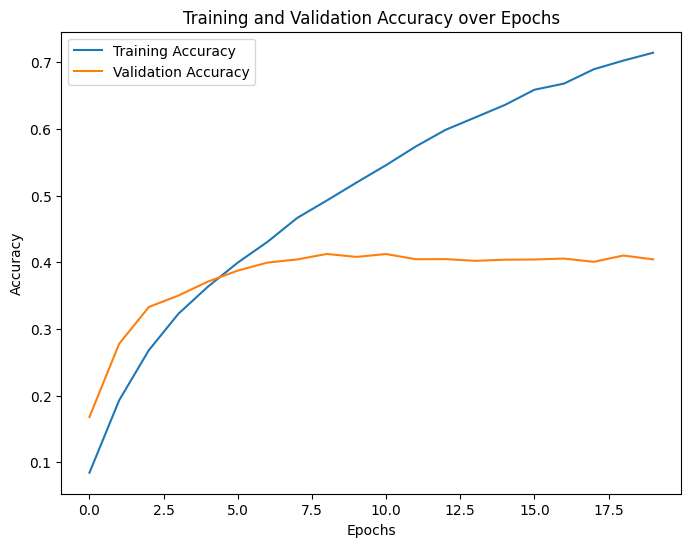

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


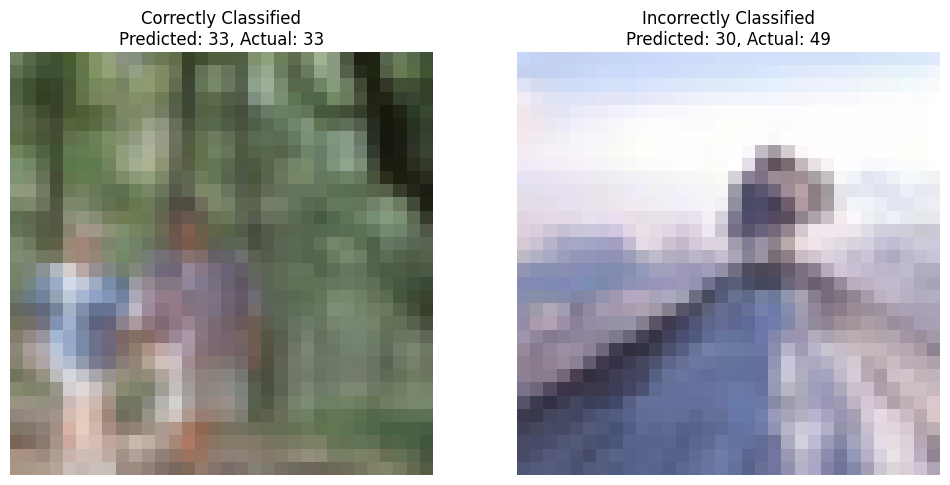

Correctly classified image probabilities:
[8.4398266e-11 3.1890895e-07 1.4919381e-08 1.2339253e-06 9.7902358e-08
 3.1865582e-08 1.9703371e-10 3.6131806e-11 6.4487394e-05 1.1078991e-05
 2.4639115e-09 1.7855072e-08 7.5258497e-05 3.1561405e-05 1.9978195e-09
 7.2752817e-05 6.8400169e-07 4.6654124e-05 7.7256561e-07 1.8179352e-06
 5.1660781e-10 3.1912919e-07 6.5175747e-08 5.5534247e-08 5.7134968e-14
 3.5223782e-06 5.8598122e-09 3.0816176e-05 1.9130129e-09 2.8244929e-05
 3.4858361e-10 7.0243125e-04 6.1102031e-07 9.7418404e-01 1.7960657e-07
 2.7132305e-07 3.4209593e-09 2.3766274e-03 7.1738400e-06 1.6237691e-06
 8.4534736e-07 2.3093567e-09 1.5600028e-05 8.5239648e-08 4.0463470e-07
 2.0369627e-07 1.3460876e-06 1.8928122e-06 5.0581841e-09 3.7958605e-06
 2.7752802e-07 1.2454584e-04 2.8189575e-07 1.8247732e-12 7.0835370e-08
 4.7667727e-06 3.6501652e-04 9.7205111e-07 3.4536811e-07 1.0777942e-03
 1.0561609e-07 2.3908580e-09 2.0502315e-12 6.1986408e-05 4.2440533e-06
 1.9446506e-04 1.5486512e-05 3.2279

In [13]:
import numpy as np

# Get predictions for test set
y_pred = model.predict(x_test)

# Find one correctly classified image (predicted class is equal to true class)
correct_idx = np.where(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))[0][0]

# Find one incorrectly classified image (predicted class is different from true class)
incorrect_idx = np.where(np.argmax(y_pred, axis=1) != np.argmax(y_test, axis=1))[0][0]

# Plot correctly classified image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f"Correctly Classified\nPredicted: {np.argmax(y_pred[correct_idx])}, Actual: {np.argmax(y_test[correct_idx])}")
plt.axis('off')

# Plot incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.title(f"Incorrectly Classified\nPredicted: {np.argmax(y_pred[incorrect_idx])}, Actual: {np.argmax(y_test[incorrect_idx])}")
plt.axis('off')

plt.show()

# Report classification probabilities for both images
print("Correctly classified image probabilities:")
print(y_pred[correct_idx])

print("\nIncorrectly classified image probabilities:")
print(y_pred[incorrect_idx])


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers

# Create an instance of ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit datagen on the training data
datagen.fit(x_train)

# Define CNN model
model = Sequential()

# Add convolutional layers, max pooling layers, and dense layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train model using data augmentation
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),  # Using augmented data
    validation_data=(x_val, y_val),  # Validation data remains unchanged
    epochs=20,
    verbose=2
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 - 30s - 24ms/step - accuracy: 0.0601 - loss: 4.1429 - val_accuracy: 0.1289 - val_loss: 3.6926
Epoch 2/20
1250/1250 - 38s - 31ms/step - accuracy: 0.1249 - loss: 3.7221 - val_accuracy: 0.1947 - val_loss: 3.3805
Epoch 3/20
1250/1250 - 41s - 33ms/step - accuracy: 0.1608 - loss: 3.4869 - val_accuracy: 0.2217 - val_loss: 3.1374
Epoch 4/20
1250/1250 - 26s - 21ms/step - accuracy: 0.1878 - loss: 3.3477 - val_accuracy: 0.2590 - val_loss: 2.9839
Epoch 5/20
1250/1250 - 26s - 21ms/step - accuracy: 0.2076 - loss: 3.2433 - val_accuracy: 0.2666 - val_loss: 2.9340
Epoch 6/20
1250/1250 - 47s - 38ms/step - accuracy: 0.2210 - loss: 3.1631 - val_accuracy: 0.2798 - val_loss: 2.8621
Epoch 7/20
1250/1250 - 35s - 28ms/step - accuracy: 0.2400 - loss: 3.0937 - val_accuracy: 0.3116 - val_loss: 2.7393
Epoch 8/20
1250/1250 - 33s - 26ms/step - accuracy: 0.2489 - loss: 3.0271 - val_accuracy: 0.3152 - val_loss: 2.7015
Epoch 9/20
1250/1250 - 39s - 31ms/step - accuracy: 0.2561 - loss: 2.9893 - val_accuracy: 0.

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [ ]:
# Re-train enhanced model (with data augmentation)
history_enhanced = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),  # Using augmented data
    validation_data=(x_val, y_val),
    epochs=20,  # Using the same number of epochs (20) as before
    verbose=2
)

Epoch 1/20
1250/1250 - 28s - 22ms/step - accuracy: 0.3199 - loss: 2.6838 - val_accuracy: 0.3715 - val_loss: 2.4190
Epoch 2/20
1250/1250 - 28s - 22ms/step - accuracy: 0.3203 - loss: 2.6703 - val_accuracy: 0.3806 - val_loss: 2.3901
Epoch 3/20
1250/1250 - 27s - 21ms/step - accuracy: 0.3240 - loss: 2.6595 - val_accuracy: 0.3783 - val_loss: 2.4166
Epoch 4/20
1250/1250 - 27s - 21ms/step - accuracy: 0.3271 - loss: 2.6391 - val_accuracy: 0.3983 - val_loss: 2.3376
Epoch 5/20
1250/1250 - 41s - 33ms/step - accuracy: 0.3325 - loss: 2.6265 - val_accuracy: 0.3998 - val_loss: 2.2925
Epoch 6/20
1250/1250 - 41s - 32ms/step - accuracy: 0.3325 - loss: 2.6155 - val_accuracy: 0.3982 - val_loss: 2.3252
Epoch 7/20
1250/1250 - 41s - 33ms/step - accuracy: 0.3347 - loss: 2.6082 - val_accuracy: 0.3986 - val_loss: 2.3160
Epoch 8/20
1250/1250 - 41s - 33ms/step - accuracy: 0.3352 - loss: 2.5933 - val_accuracy: 0.3938 - val_loss: 2.3470
Epoch 9/20
1250/1250 - 27s - 21ms/step - accuracy: 0.3351 - loss: 2.5915 - val_a

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

Initial model performance was not great having topped at 71.4% even after 20 epochs, although accuracy had steadily improved with each successive epoch. I had increased the number of epochs from 10 to 20 because performance was even poorer at 10 versus 20. The model's performance did not markedly improve after enhancement. Accuracy on the test set increased, indicating that the techniques applied helped the model to generalize better on unseen data. The model had previously overfitted to the training set and benefited from the added diversity in the data. The reduction in overfitting enabled the model to perform better on the validation and test sets.

That said, further improvement could still be made in a variety of ways. Some methods could include incorporating more techniques like transfer learning (using pre-trained models), adjusting the learning rate, or adding regularization methods might improve performance. Increasing the number of layers or using dropout more effectively could also contribute to better generalization.  In the future, applying a deeper neural network to further improve the model’s accuracy.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.